ROI Classification
--
Info about classes:  
This scripts includes a pretrained model to classify ROIs as one of the following categories:
- **Label 0:** Neuron + In-plane ("Great")
- **Label 1:** Neuron + Semi-in-plane ("Okay")
- **Label 4:** Neuron + Out of plane ("Poor")
- **Label 5:** Dendrite

(*note that during the manual labeling, 0-5 is actually 1-6*)  <br>
(*label 2 is for weird blobs and shadows of neurons*)  <br>
(*label 3 is empty on purpose*)  <br>
___

Info about neural network:  
The network is trained on ~4700 ROIs from one FOV  
(mouse 6.28 , recorded on 20200903)  
- **Net_ROIClassifier_20200917.pth** state_dict file must be in path
- This script is specifically for the above .pth parameters file. Changes to the architecture cannot be made here.
___

Input data requirements:
---
- 36x36 images
- dim1: image number
- dim 2,3: y,x
- should be normalized between 0-1  


- **There are cell blocks to use the 'stat.npy' output from Suite2p and convert to the required format**


- Full FOV size (in pixels) should be known. Default=512x1024
___



In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
# import sys
# import copy

import numpy as np

import scipy
import scipy.signal
from scipy.io import savemat

import matplotlib.pyplot as plt

import sys

from pathlib import Path

In [4]:
import sys
# sys.path.append("/n/data1/hms/neurobio/sabatini/rich/github_repos/")
sys.path.append("/media/rich/Home_Linux_partition/github_repos/")

%load_ext autoreload
%autoreload 2
from basic_neural_processing_modules import *
from GCaMP_ROI_classifier.new_stuff import util

In [5]:
## lOAD stat.npy file

dir_load = r'/media/rich/bigSSD/res2p/scanimage data/round 5 experiments/20210325/suite2p/plane0'
fileName_load = 'stat.npy'

path_stat = Path(dir_load) / fileName_load
print(path_stat)

/media/rich/bigSSD/res2p/scanimage data/round 5 experiments/20210325/suite2p/plane0/stat.npy


In [6]:
%matplotlib inline
sf_all_list = util.import_multiple_stat_files(
    paths_statFiles=path_stat, 
    out_height_width=[36,36], 
    max_footprint_width=241, 
    plot_pref=False
)

In [7]:
images = sf_all_list[0]

In [99]:
# Label: **1=Neuron-InPlane-GOOD , 2=Neuron-OutOfPlane-GOOD , 3=NonNeuron-GOOD , 4=Neuron-InPlane-BAD , 5=Neuron-OutOfPlane-BAD , **6=NonNeuron-BAD

# To stop labeling enter a value of 8-9
num_ROI = images.shape[0]

labels = np.empty(num_ROI)
labels[:] = np.nan
print(f'number of ROIs: {num_ROI}')

number of ROIs: 4893


In [100]:
%matplotlib qt

In [101]:
num_ROI = images.shape[0]

input_val = 0
iter_ROI = 0

fig, ax = plt.subplots(1,1)
imshow_FOV = ax.imshow(np.zeros_like(images[0]))
plt.pause(0.35) 


while np.int8(input_val) < 7 and iter_ROI <= num_ROI:
    plt.imshow(images[iter_ROI, : , :])

    plt.pause(0.05)
    plt.show(block=False)
    fig.canvas.draw()
    
    input_val = input()
    if np.int8(input_val) >=7:
        input_val = np.nan
    labels[iter_ROI] = np.int8(input_val)
    plt.pause(0.05) 
    if iter_ROI%10==0:
        print(f'Num labeled: {iter_ROI}')
    
    iter_ROI +=1
#     clear_output(wait=True)
    

0
Num labeled: 0
1
2
3
4
5
9


ValueError: cannot convert float NaN to integer

In [33]:
# np.save('labels_posthoc_filledIn.npy',labels_posthoc_filledIn)
np.save('labels_posthoc_mouseUnknownAi148__20210325.npy', labels)

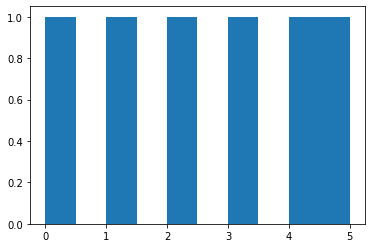

In [104]:
%matplotlib inline
plt.figure()
plt.hist(labels);